<a href="https://colab.research.google.com/github/Valiev-Koyiljon/Stable-Diffusion-Transformers/blob/main/image_2_image_using_diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image2Image Pipeline for Stable Diffusion using Diffusers

This notebook shows how to create a custom `diffusers` pipeline for  text-guided image-to-image generation with Stable Diffusion model using  Hugging Face [ Diffusers library](https://github.com/huggingface/diffusers).




In [ ]:
!nvidia-smi

Sun Oct 29 04:19:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Installing the **diffuser transformer**

In [ ]:
!pip install diffusers==0.11.1 transformers ftfy accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.0 MB/s eta 0:00:00


To use private and gated models on 🤗 Hugging Face Hub, login is required. If you are only using a public checkpoint (such as `CompVis/stable-diffusion-v1-4` in this notebook), you can skip this step.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

## Image2Image pipeline.

In [ ]:
import inspect
import warnings
from typing import List, Optional, Union
import torch
from tqdm.auto import tqdm


from diffusers import StableDiffusionImg2ImgPipeline

Load the pipeline

In [ ]:
device = "cuda"
model_path = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
)
pipe = pipe.to(device)

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 30 files:   0%|          | 0/30 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Download an initial image and preprocess it so we can pass it to the pipeline.

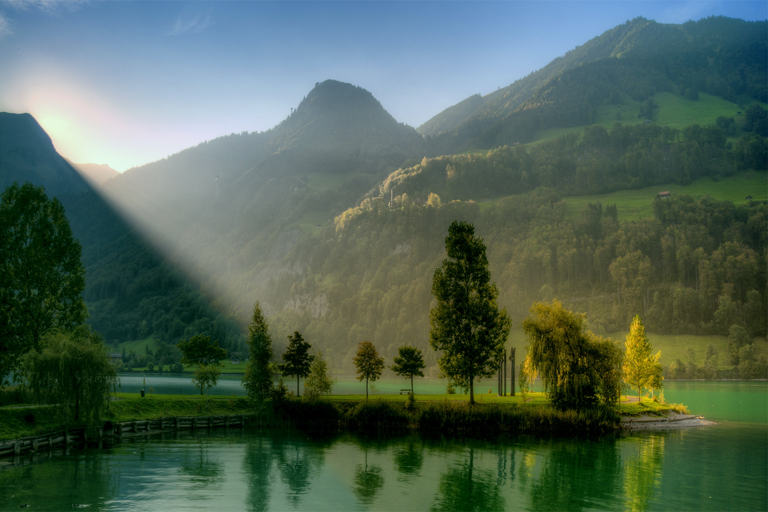

In [ ]:
import requests
from PIL import Image
from io import BytesIO


def image_from_url(url):
    """Function to read
    the image from URL"""

    response = requests.get(url)
    response.raise_for_status()
    image = Image.open(BytesIO(response.content))
    image_rgb = image.convert('RGB')
    img = image_rgb.resize((768, 512))
    return img



url ="https://www.pixelstalk.net/wp-content/uploads/2016/03/Nature-wallpapers-hd-backgroud.jpg"
rgb_image = image_from_url(url)
rgb_image


Define the prompt and run the pipeline.

In [ ]:
prompt = "Serene lakeside landscape with sun rays breaking through the mountains, casting a soft glow on lush greenery and calm waters"

Here, `strength` is a value between 0.0 and 1.0, that controls the amount of noise that is added to the input image. Values that approach 1.0 allow for lots of variations but will also produce images that are not semantically consistent with the input.

In [ ]:
generator = torch.Generator(device=device).manual_seed(42)
image = pipe(prompt=prompt, image=rgb_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/37 [00:00<?, ?it/s]

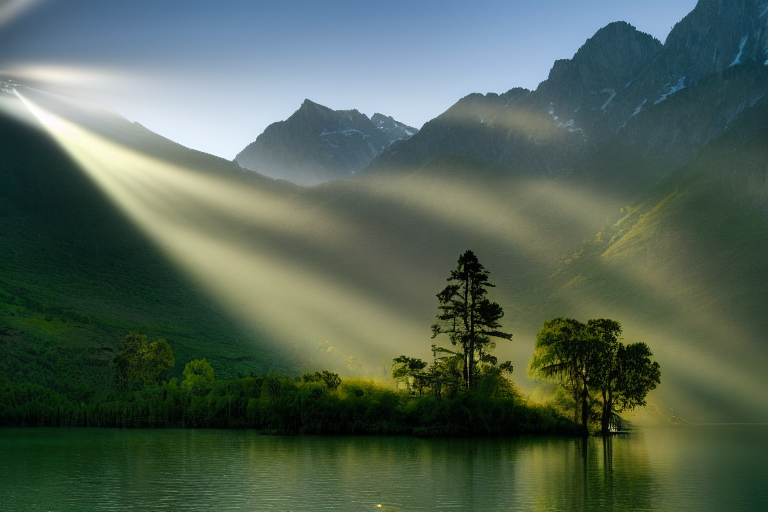

In [ ]:
image

In [ ]:
generator = torch.Generator(device=device).manual_seed(42)
image = pipe(prompt=prompt, image=rgb_image, strength=0.94, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/47 [00:00<?, ?it/s]

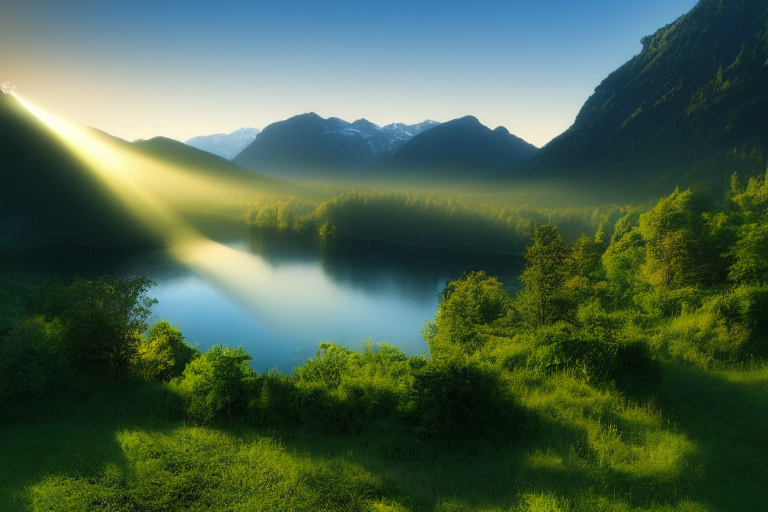

In [ ]:
image

In [ ]:
generator = torch.Generator(device=device).manual_seed(42)
image = pipe(prompt=prompt, image=rgb_image, strength=0.99, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/49 [00:00<?, ?it/s]

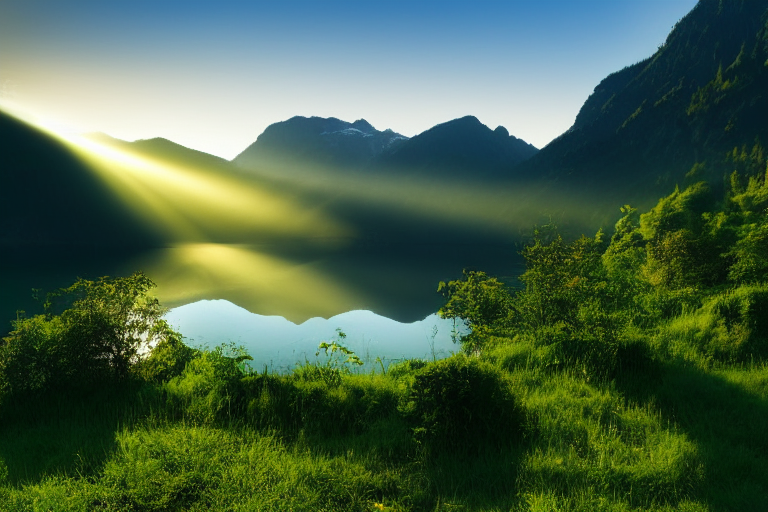

In [ ]:
image

In [ ]:
generator = torch.Generator(device=device).manual_seed(42)
image = pipe(prompt=prompt, image=rgb_image, strength=1, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

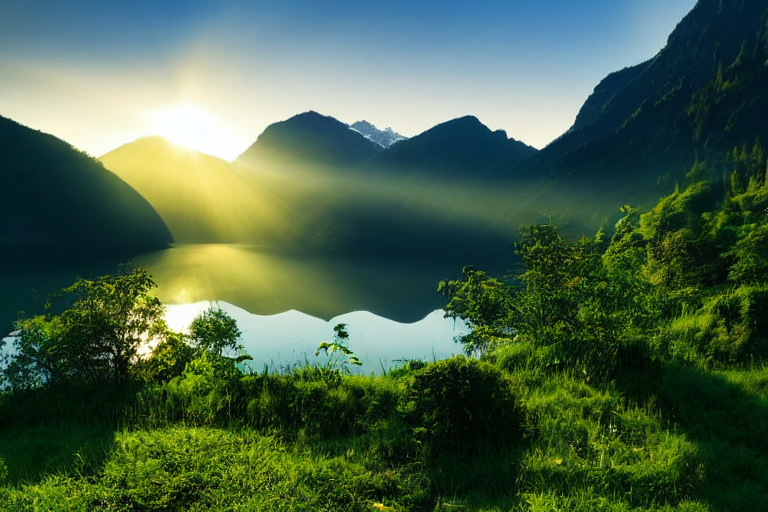

In [ ]:
image

In [ ]:
image = pipe(prompt=prompt, image=rgb_image, strength=0.5, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

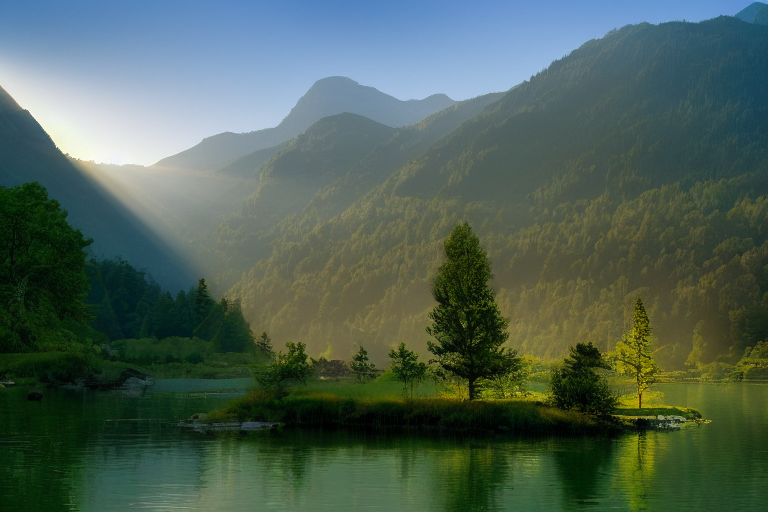

In [ ]:
image

As you can see, when using a lower value for `strength`, the generated image is more closer to the original `image`


Now using [LMSDiscreteScheduler](https://huggingface.co/docs/diffusers/api/schedulers#diffusers.LMSDiscreteScheduler)

In [ ]:
from diffusers import LMSDiscreteScheduler

lms = LMSDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.scheduler = lms

In [ ]:
generator = torch.Generator(device=device).manual_seed(1024)
image = pipe(prompt=prompt, image=rgb_image, strength=0.75, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/37 [00:00<?, ?it/s]

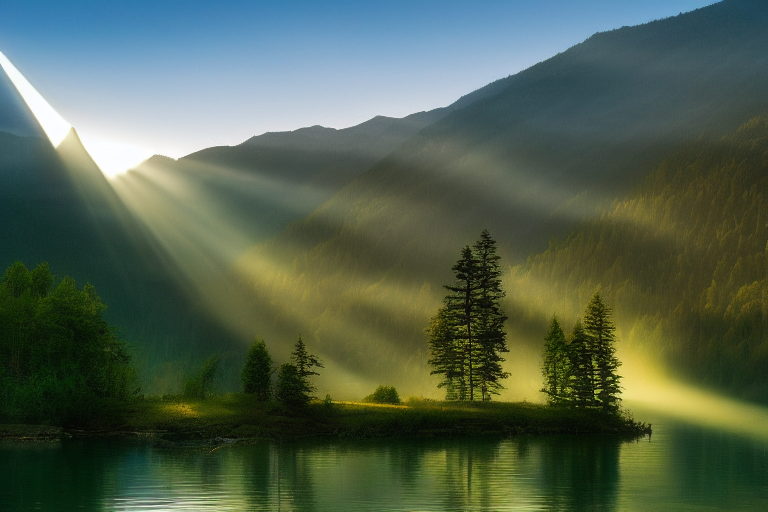

In [ ]:
image